### Creating the train, dev, test dataframes (Filtered: With "yes", "no", "one", "two", "three", "four")

In [1]:
import os
import pandas as pd

train_file = os.path.join("tsv_files", "filtered_train.tsv")
dev_file = os.path.join("tsv_files", "filtered_dev.tsv")
test_file = os.path.join("tsv_files", "filtered_test.tsv")

filtered_train_df = pd.read_csv(train_file, sep='\t')
filtered_dev_df = pd.read_csv(dev_file, sep='\t')
filtered_test_df = pd.read_csv(test_file, sep='\t')


### Creating the column "predicted_sentence" in the dataframe, with the predicted_sentence of the model function

In [4]:
from speechWAVOverfit import speechWAVOverfit

def adding_predicted_sentences(dataframe, audio_repo_path, model_function):
    for filename in os.listdir(audio_repo_path): #wav format
        output = model_function(audio_repo_path + "/" + filename)
        filename = filename.replace(".wav", ".mp3") #the path in the dataframe is in the format mp3
        dataframe.loc[dataframe['path'] == filename, 'predicted_sentence_overfit'] = output

audio_paths = ["./en_train_full_subset/target_directory", "./en_dev_full_subset/target_directory", "./en_test_full_subset/target_directory"]
dataframes = [filtered_train_df, filtered_dev_df, filtered_test_df]

for i in range(len(dataframes)):
    adding_predicted_sentences(dataframes[i], audio_paths[i], speechWAVOverfit)


In [25]:
# unique_predicted_sentences = filtered_train_df['predicted_sentence'].unique()
# unique_predicted_sentences

# unique_predicted_sentences = dataframes[2]['predicted_sentence_overfit'].unique()
# unique_predicted_sentences


### Converting numericals to string equivalent and Adding a column correct_predicted to the dataframes

In [26]:
from numToString import numToString

for i in range(len(dataframes)):
    dataframes[i]['predicted_sentence_overfit'] = dataframes[i]['predicted_sentence_overfit'].apply(numToString)
    dataframes[i]["correct_predicted_overfit"] = dataframes[i].apply(lambda row: row['sentence'] == row['predicted_sentence_overfit'], axis=1)    


### Storing dataframes to csv files

In [27]:
dataframes[0].to_csv('filtered_train_overfit.csv', index=False)
dataframes[1].to_csv('filtered_dev_overfit.csv', index=False)
dataframes[2].to_csv('filtered_test_overfit.csv', index=False)

### Loading dataframes from csv files

In [28]:
filtered_train_overfit_df = pd.read_csv('filtered_train_overfit.csv')
filtered_dev_overfit_df = pd.read_csv('filtered_dev_overfit.csv')
filtered_test_overfit_df = pd.read_csv('filtered_test_overfit.csv')

### Ploping the percentage of correct predictions for each dataframe

[79.97986480655833, 74.97845446710716, 74.79088549177963]


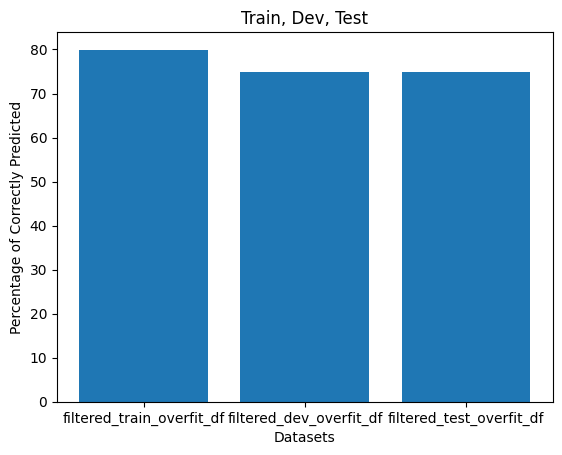

In [33]:
# Calculate the percentage of correct predictions
names_df = [filtered_train_overfit_df, filtered_dev_overfit_df, filtered_test_overfit_df]
names_df_string = ["filtered_train_overfit_df", "filtered_dev_overfit_df", "filtered_test_overfit_df"]
percentage_of_true_table = []
for name in names_df:
    percentage_of_true_table.append(100 * name['correct_predicted_overfit'].value_counts()[True] / name.shape[0])

# print(percentage_of_true_table) #[79.97986480655833, 74.97845446710716, 74.79088549177963]
#Bar plot
import matplotlib.pyplot as plt

#Create a bar plot of the 'char_error_rate' column
plt.bar(names_df_string, percentage_of_true_table)

# Add x and y labels
plt.xlabel('Datasets')
plt.ylabel('Percentage of Correctly Predicted')

# Add title
plt.title('Train, Dev, Test')

# Show the plot
plt.show()


### Ploping the count of all results for each answer in answers (for training set)

In [41]:
def plopingCountResults(dataframe, answers, compared, comparing):
    answer_dfs = {}
    # Iterate over the answers
    for answer in answers:
        # Create a DataFrame for the current answer
        answer_dfs[answer] = dataframe[dataframe[compared] == answer]
        
    # Create a figure with multiple subplots
    fig, axs = plt.subplots(3, 2,figsize=(15,15))

    # Iterate over the subplots and the answers
    for ax, answer in zip(axs.flat, answers):
        # Count the unique values of predicted_sentence for the current answer
        predicted_sentence_counts = answer_dfs[answer][comparing].value_counts()
        
        # Create a bar chart of the count of unique values of "predicted_sentence"
        predicted_sentence_counts.plot(ax=ax, kind='barh')
        
        # Add a title to the subplot
        ax.set_title(f'Predicted Sentence Counts for "{answer}"')
        
    # Show the plot
    plt.show()

In [ ]:
answers = ["yes", "no", "one", "two", "three", "four"]

filtered_train_overfit_df_false = filtered_train_overfit_df[filtered_train_overfit_df['correct_predicted_overfit'] == False]
filtered_train_overfit_df_false_without_unknownValueError = filtered_train_overfit_df_false[filtered_train_overfit_df_false['predicted_sentence_overfit'] != "<class 'speech_recognition.UnknownValueError'>"]

plopingCountResults(filtered_train_overfit_df, answers, 'sentence', 'predicted_sentence_overfit')
plopingCountResults(filtered_train_overfit_df_false, answers, 'sentence', 'predicted_sentence_overfit')
plopingCountResults(filtered_train_overfit_df_false_without_unknownValueError, answers, 'sentence', 'predicted_sentence_overfit')


### Ploping the count of all results for each answer in answers (for dev set)

In [ ]:
answers = ["yes", "no", "one", "two", "three", "four"]

filtered_dev_overfit_df_false = filtered_dev_overfit_df[filtered_dev_overfit_df['correct_predicted_overfit'] == False]
filtered_dev_overfit_df_false_without_unknownValueError = filtered_dev_overfit_df_false[filtered_dev_overfit_df_false['predicted_sentence_overfit'] != "<class 'speech_recognition.UnknownValueError'>"]

plopingCountResults(filtered_dev_overfit_df, answers, 'sentence', 'predicted_sentence_overfit')
plopingCountResults(filtered_train_overfit_df_false, answers, 'sentence', 'predicted_sentence_overfit')
plopingCountResults(filtered_train_overfit_df_false_without_unknownValueError, answers, 'sentence', 'predicted_sentence_overfit')

### Ploping the count of all results for each answer in answers (for test set)

In [ ]:
answers = ["yes", "no", "one", "two", "three", "four"]

filtered_test_overfit_df_false = filtered_test_overfit_df[filtered_test_overfit_df['correct_predicted_overfit'] == False]
filtered_test_overfit_df_false_without_unknownValueError = filtered_test_overfit_df_false[filtered_test_overfit_df_false['predicted_sentence_overfit'] != "<class 'speech_recognition.UnknownValueError'>"]

plopingCountResults(filtered_test_overfit_df, answers, 'sentence', 'predicted_sentence_overfit')
plopingCountResults(filtered_test_overfit_df_false, answers, 'sentence', 'predicted_sentence_overfit')
plopingCountResults(filtered_test_overfit_df_false_without_unknownValueError, answers, 'sentence', 'predicted_sentence_overfit')

### Precision for each answer (Train dataset)

In [46]:
import matplotlib.pyplot as plt

def plopPrecisionBySentence(dataframe, sentences, compared, correct_predicted):
    precisions = {}
    for sentence in sentences:
        correct_predictions = dataframe[(dataframe[compared] == sentence) & (dataframe[correct_predicted] == True)].shape[0]
        total_predictions = dataframe[dataframe[compared] == sentence].shape[0]
        precisions[sentence] = correct_predictions / total_predictions

    plt.bar(sentences, precisions.values())
    plt.xticks(sentences)
    plt.xlabel("Sentence")
    plt.ylabel("Precision")
    plt.title("Precision by Sentence")
    for i, val in enumerate(precisions.values()):
        plt.text(i, val, str(round(val, 2)))
    plt.show()

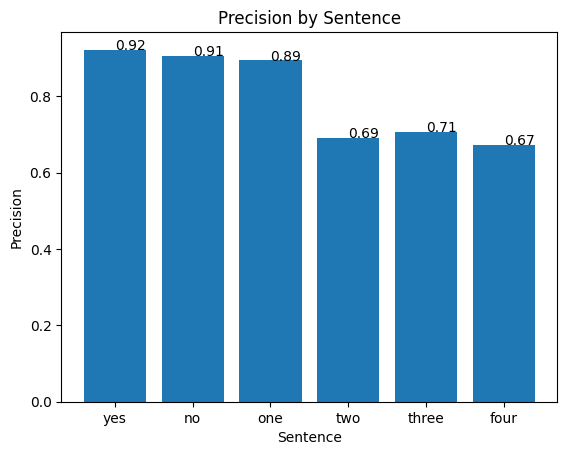

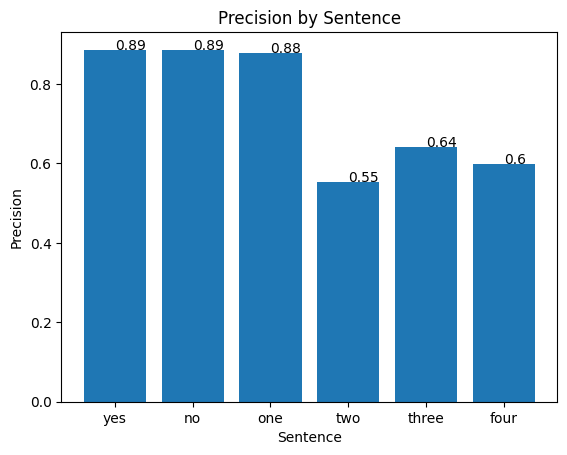

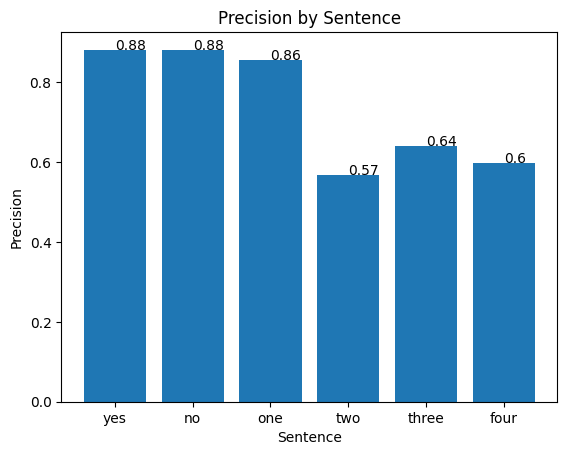

In [47]:
sentences = ["yes", "no", "one", "two", "three", "four"]
plopPrecisionBySentence(filtered_train_overfit_df, sentences, "sentence", "correct_predicted_overfit")
plopPrecisionBySentence(filtered_dev_overfit_df, sentences, "sentence", "correct_predicted_overfit")
plopPrecisionBySentence(filtered_test_overfit_df, sentences, "sentence", "correct_predicted_overfit")

### Computing the score of the model in our dataset

In [54]:
from sklearn.metrics import f1_score

def f1scoreModel(acc_train,acc_test):
    # convert accuracy to error rate (1 - accuracy)
    err_train = 1 - acc_train
    err_test = 1 - acc_test

    # compute precision and recall using error rate
    precision_train = 1 - err_train
    recall_train = 1 - err_train
    precision_test = 1 - err_test
    recall_test = 1 - err_test

    # compute f1 score for train and test datasets
    # f1_train = f1_score(precision_train, recall_train)
    # f1_test = f1_score(precision_test, recall_test)
    f1_train = 2 * (precision_train * recall_train) / (precision_train + recall_train)
    f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)

    print("F1 score for train dataset: ", f1_train)
    print("F1 score for test dataset: ", f1_test)


In [56]:
acc_train = filtered_train_overfit_df[filtered_train_overfit_df['correct_predicted_overfit'] == True].shape[0] / filtered_test_overfit_df.shape[0]
acc_dev = filtered_dev_overfit_df[filtered_dev_overfit_df['correct_predicted_overfit'] == True].shape[0] / filtered_dev_overfit_df.shape[0]
acc_test = filtered_test_overfit_df[filtered_test_overfit_df['correct_predicted_overfit'] == True].shape[0] / filtered_test_overfit_df.shape[0]

f1scoreModel(acc_train, acc_test)

# F1 score for train dataset:  1.603980386501298
# F1 score for test dataset:  0.7479088549177964

F1 score for train dataset:  1.603980386501298
F1 score for test dataset:  0.7479088549177964


### A

In [ ]:
small_tsv_files = os.path.join("tsv_files", "small_tsv_files.tsv")

small_tsv_files_df = pd.read_csv(small_tsv_files, sep='\t')
small_tsv_files_df

small_tsv_files_audio_repo_path = "./small_subset/target_directory"


# dataframe_small_subset = 
adding_predicted_sentences(small_tsv_files_df, small_tsv_files_audio_repo_path, speechWAVOverfit)

#small_tsv_files_df
small_tsv_files_df


# from speechFileWAVToTextFunction import speechFileWAVToTextFunction
# adding_predicted_sentences(small_tsv_files_df, small_tsv_files_audio_repo_path, speechFileWAVToTextFunction)
# small_tsv_files_df


In [ ]:
for filename in os.listdir("./small_subset/target_directory"):
    # print(filename) #wav format
    
    output = speechWAVOverfit("./small_subset/target_directory" + "/" + filename)
    print("output=",output)
    filename = filename.replace(".wav", ".mp3") #the path in the dataframe is in the format mp3
    # print("filename=",filename)
    small_tsv_files_df.loc[small_tsv_files_df['path'] == filename, 'predicted_sentence'] = output
    # small_tsv_files_df = small_tsv_files_df.reindex(small_tsv_files_df.loc[small_tsv_files_df['path'] == filename].index.union(small_tsv_files_df.index))
small_tsv_files_df

In [ ]:
#"common_voice_en_22274560.mp3" #one, morning, regardons la liste des mots proposés
from speechFileWAVToTextFunction import speechFileWAVToTextFunction
speechFileWAVToTextFunction("./small_subset/target_directory/common_voice_en_22274560.wav")

# {'alternative': [{'transcript': 'morning', 'confidence': 0.95467669},
#   {'transcript': 'moaning'},
#   {'transcript': 'warning'},
#   {'transcript': 'running'},
#   {'transcript': 'boring'}],
#  'final': True}

#Ok, "one" n'apparait jamais, et donc morning est renvoyé puisqu'il a la meilleure fréquence